In [1]:
# Se importan las librerías necesarias

import matplotlib.pyplot as plt
import numpy as np
from skimage import io, img_as_float, filters, data
import math
from skimage.feature import local_binary_pattern

from skimage.color import label2rgb
from skimage.transform import rotate

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


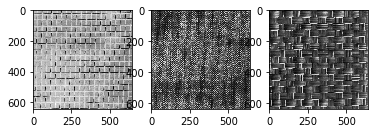

In [2]:
# Se carga la imagen y se la convierte a escala de grises

textura1 = io.imread(fname="texture1.gif", as_grey=True)


textura2 = io.imread(fname="texture2.gif", as_grey=True)


textura3 = io.imread(fname="texture3.gif", as_grey=True)


f, (ax0, ax1, ax2) = plt.subplots(1, 3)
ax0.imshow(textura1, cmap ='gray')
ax1.imshow(textura2, cmap ='gray')
ax2.imshow(textura3, cmap ='gray')

plt.show()

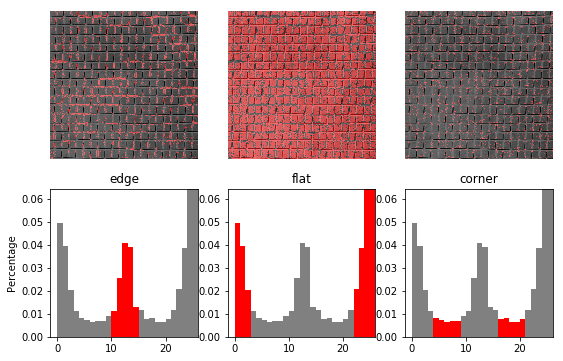

In [4]:
METHOD = 'uniform'

# settings for LBP
radius = 3
n_points = 8 * radius

def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')

image = textura1
lbp = local_binary_pattern(image, n_points, radius, METHOD)


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(ymax=np.max(counts[:-1]))
    ax.set_xlim(xmax=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

(array([0.03532344, 0.05787539, 0.02024395, 0.01091035, 0.00723633,
        0.00593887, 0.00408535, 0.00480137, 0.00471758, 0.00745723,
        0.0078584 , 0.01887793, 0.02640117, 0.02162773, 0.00970684,
        0.00864297, 0.00697734, 0.00780508, 0.00591094, 0.00739121,
        0.0082875 , 0.0134418 , 0.02306484, 0.04994844, 0.05625801,
        0.60920996]),
 array([ 0.        ,  0.96153846,  1.92307692,  2.88461538,  3.84615385,
         4.80769231,  5.76923077,  6.73076923,  7.69230769,  8.65384615,
         9.61538462, 10.57692308, 11.53846154, 12.5       , 13.46153846,
        14.42307692, 15.38461538, 16.34615385, 17.30769231, 18.26923077,
        19.23076923, 20.19230769, 21.15384615, 22.11538462, 23.07692308,
        24.03846154, 25.        ]),
 <a list of 26 Patch objects>)

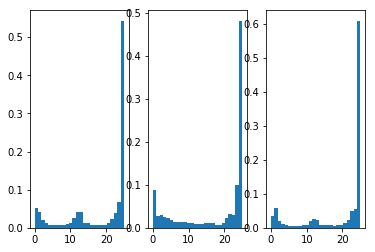

In [12]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3)

lbp1 = local_binary_pattern(textura1, n_points, radius, METHOD)
lbp2 = local_binary_pattern(textura2, n_points, radius, METHOD)
lbp3 = local_binary_pattern(textura3, n_points, radius, METHOD)

n_bins = 26
#np.unique(lbp1.ravel())
ax0.hist(lbp1.ravel(), normed=True, bins=26)
ax1.hist(lbp2.ravel(), normed=True, bins=26)
ax2.hist(lbp3.ravel(), normed=True, bins=26)

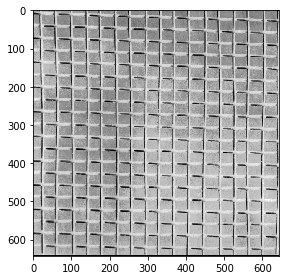

In [19]:
textura1rot= rotate(textura1, angle=90, resize=False)
io.imshow(textura1rot)